In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



%matplotlib notebook

In [2]:
G = nx.karate_club_graph()

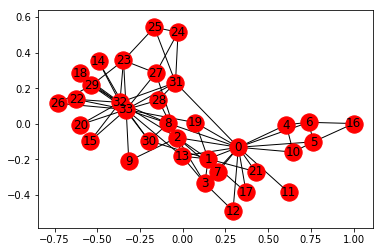

In [3]:
plt.figure()
nx.draw_networkx(G)

In [4]:
from operations import Operations

Opobj = Operations(G,'operations.yaml')
Opobj.load_yaml()
Opobj.G
Opobj.feature_extraction()





In [10]:
import yaml

with open("operations.yaml", 'r') as stream:
    operations_dict = yaml.load(stream)

In [11]:
from importlib import import_module

operation = operations_dict['BasicStats']
main_params = ['filename','classname','shortname','keywords']
filename = operation[main_params[0]]
classname = operation[main_params[1]]
cls = getattr(import_module(filename), classname)
cls = cls(G)
cls.feature_extraction()
cls.features
cls.feature_names

['num_nodes', 'num_edges', 'degree_mean', 'degree_median', 'degree_std']

In [12]:



feature_names = []
features = []

        # loop over the feature classes defined in the YAML file
for i, key in enumerate(operations_dict.keys()):
    operation = operations_dict[key]

    #Extract the filename and class name
    main_params = ['filename','classname','shortname','keywords']
    filename = operation[main_params[0]]
    classname = operation[main_params[1]]
    symbolic_name = operation[main_params[2]]
    keywords = operation[main_params[3]]

    # Extracting all additional arguments if they exist
    params = []
    args = list(operation.keys() - main_params)
    for arg in args:
        params.append(operation[arg])

    print(filename)
    # import the class from the file
    feature_obj = getattr(import_module(filename), classname)
    feature_obj = feature_obj(G)
    
    if not params:
        feature_obj.feature_extraction()
    else: 
        feature_obj.feature_extraction(params)
    
    
    # Alter the feature feature_names
    f_names = feature_obj.feature_names
    f_names_updated = [symbolic_name + f_name for f_name in f_names]

    # Append the altered feature names and the feature list of values
    feature_names.append(f_names_updated)
    features.append(feature_obj.features)


basic_stats
triangles
centrality_degree
centrality_degree
centrality_degree


In [20]:
params

[50, 45]

In [7]:
Opobj.feature_names

[['BS_num_nodes',
  'BS_num_edges',
  'BS_degree_mean',
  'BS_degree_median',
  'BS_degree_std'],
 ['TS_num_triangles',
  'TS_transitivity',
  'TS_clustering_mean',
  'TS_clustering_std',
  'TS_clustering_median',
  'TS_square_clustering_mean',
  'TS_square_clustering_std',
  'TS_square_clustering_median'],
 ['mean_10', 'std_10', 'opt_model_10', 'powerlaw_a_10', 'powerlaw_SSE_10'],
 ['mean_20', 'std_20', 'opt_model_20', 'powerlaw_a_20', 'powerlaw_SSE_20'],
 ['mean_50', 'std_50', 'opt_model_50', 'powerlaw_a_50', 'powerlaw_SSE_50']]